In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Charger les données agent_stats de 2025
agent_df = pd.read_csv("/home/van-pc_ivan/Data_Ana/2025/agents_stats.csv")

# Afficher les premières lignes du DataFrame pour vérifier le chargement
agent_df.head()

,agent_name,total_utilization,Lotus,Abyss,Corrode,Ascent,Bind,Sunset,Haven
0,Omen,80.0,100.0,68.0,85.0,100.0,0.0,100.0,100.0
1,Sova,53.0,0.0,100.0,35.0,100.0,0.0,73.0,95.0
2,Yoru,53.0,56.0,50.0,46.0,68.0,77.0,41.0,30.0
3,Viper,43.0,47.0,0.0,77.0,0.0,95.0,23.0,65.0
4,Fade,43.0,94.0,0.0,65.0,0.0,77.0,27.0,5.0


/tmp/ipykernel_1567/2069370464.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


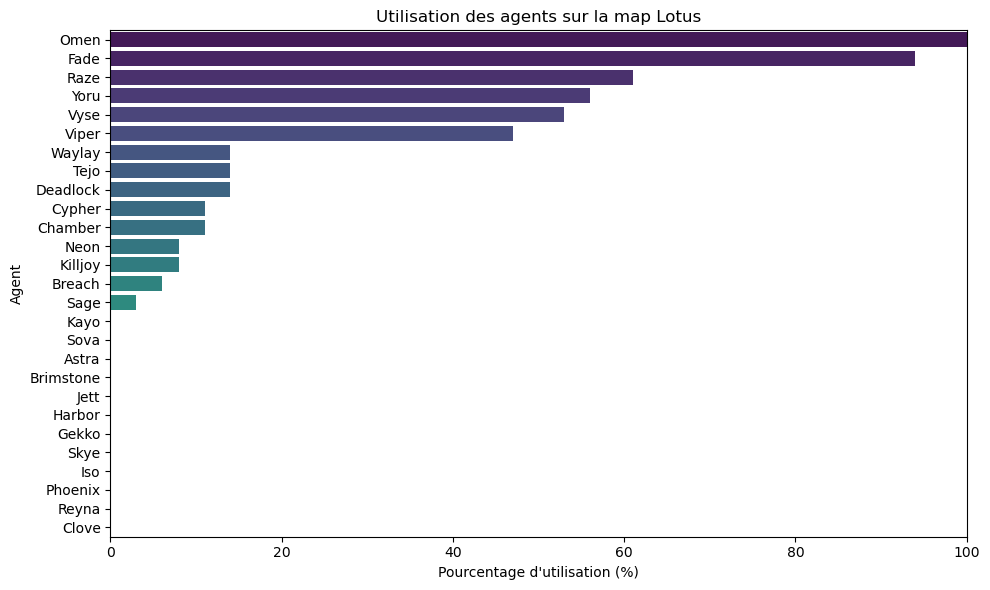

In [3]:

# Générer un graphique pour une seule map montrant l'utilisation des agents

if 'agent_name' in agent_df.columns:
    # Choisissez le nom de la carte à afficher (par exemple "Lotus")
    map_name = "Lotus"  # Remplacez par le nom de la carte souhaitée

    if map_name in agent_df.columns:
        plt.figure(figsize=(10, 6))
        sorted_df = agent_df.sort_values(by=map_name, ascending=False)
        sns.barplot(
            x=map_name, 
            y='agent_name', 
            data=sorted_df,
            palette='viridis'
        )
        plt.title(f"Utilisation des agents sur la map {map_name}")
        plt.xlabel("Pourcentage d'utilisation (%)")
        plt.ylabel("Agent")
        plt.xlim(0, 100)
        plt.tight_layout()
        plt.show()
    else:
        print(f"La colonne '{map_name}' n'est pas présente dans le DataFrame.")
else:
    print("La colonne 'agent_name' n'est pas présente dans le DataFrame.")

In [4]:
# Afficher le "winrate" des joueurs et de leurs équipes à partir de player_stats.csv
# Ici, winrate = rating

# Charger les données player_stats
player_stats_path = "/home/van-pc_ivan/Data_Ana/2025/player_stats.csv"
player_df = pd.read_csv(player_stats_path)

# Vérifier les colonnes disponibles
print("Colonnes disponibles dans player_stats.csv :", list(player_df.columns))

# Affichage du "winrate" (rating) des joueurs
if 'rating' in player_df.columns:
    print("\nWinrate (rating) des joueurs :")
    display(player_df[['player_name', 'team', 'rating']].sort_values(by='rating', ascending=False).head(10))
else:
    print("\nAucune colonne 'rating' trouvée pour les joueurs.")

# Calculer le "winrate" (rating) moyen par équipe
if 'rating' in player_df.columns:
    print("\nWinrate (rating) moyen par équipe :")
    team_rating = player_df.groupby('team')['rating'].mean().reset_index()
    display(team_rating.sort_values(by='rating', ascending=False))
else:
    print("\nAucune colonne 'rating' trouvée pour les équipes.")


Colonnes disponibles dans player_stats.csv : ['player', 'player_name', 'team', 'player_id', 'agents', 'agents_count', 'rounds', 'rating', 'acs', 'kd_ratio', 'kast', 'adr', 'kpr', 'apr', 'fkpr', 'fdpr', 'hs_percent', 'cl_percent', 'clutches', 'k_max', 'kills', 'deaths', 'assists', 'first_kills', 'first_deaths']

Winrate (rating) des joueurs :


,player_name,team,rating
0,aspas,MIBR,1.33
1,RieNs,TH,1.17
2,brawk,NRG,1.16
3,kaajak,FNC,1.15
4,johnqt,SEN,1.14
5,Smoggy,EDG,1.13
6,leaf,G2,1.11
7,something,PRX,1.10
8,Knight,BLG,1.10
9,skuba,NRG,1.09



Winrate (rating) moyen par équipe :


,team,rating
7,MIBR,1.084000
8,NRG,1.044000
4,FNC,1.016667
5,G2,1.016000
9,PRX,1.006000
13,TH,0.980000
2,DRX,0.980000
3,EDG,0.974000
15,XLG,0.970000
6,GX,0.958000


/tmp/ipykernel_1567/983745424.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df['Roles'] = match_df['agent'].apply(lambda x: get_roles(x, agents_df))


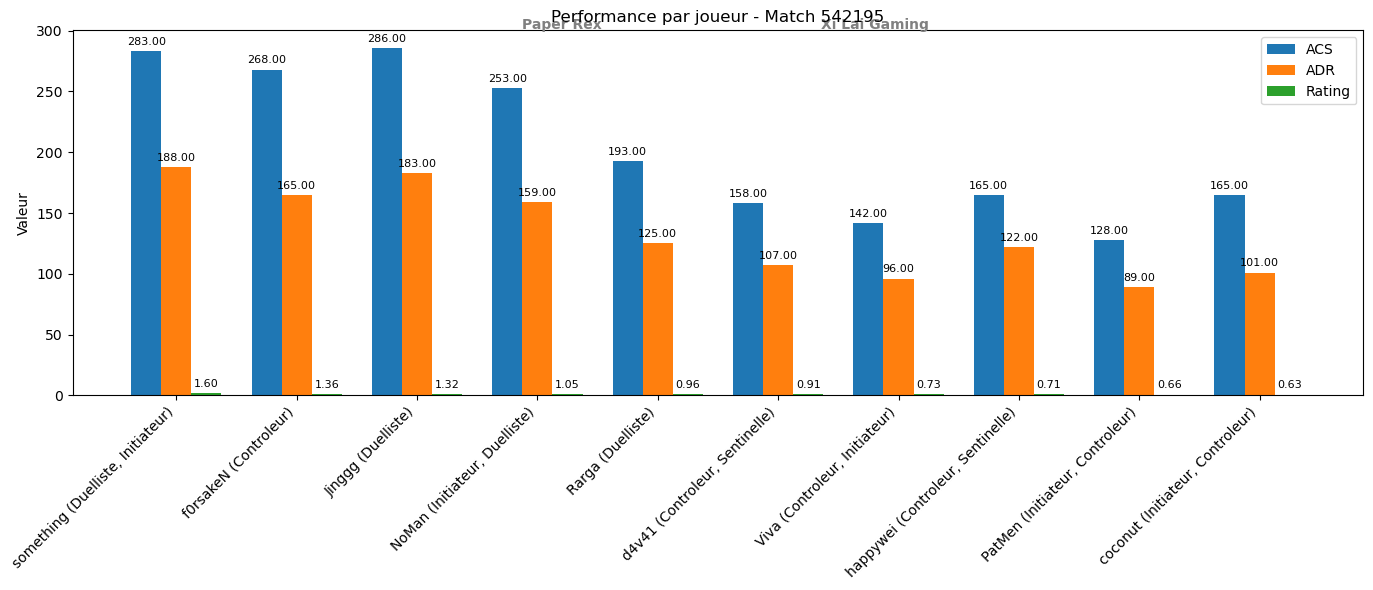

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Charger les fichiers CSV ---
detailed_stats_path = "/home/van-pc_ivan/Data_Ana/2025/detailed_matches_player_stats.csv"
agents_path = "/home/van-pc_ivan/Data_Ana/2025/agent.csv"

df = pd.read_csv(detailed_stats_path)
agents_df = pd.read_csv(agents_path)  # colonnes : Agent, Role

# --- Filtrer le match et les stats globales ---
match_id = 542195
match_df = df[(df["match_id"] == match_id) & (df["stat_type"] == "overall")]

# --- Fonction pour récupérer les rôles des agents (même si plusieurs agents) ---
def get_roles(agent_cell, agents_df):
    agents = [a.strip() for a in agent_cell.split(',')]
    roles = []
    for a in agents:
        match = agents_df[agents_df['Agent'].str.strip().str.lower() == a.lower()]
        if not match.empty:
            roles.append(match['Role'].values[0])
        else:
            roles.append("Inconnu")
    # supprimer les doublons
    roles = list(dict.fromkeys(roles))
    return ", ".join(roles)

# Appliquer la fonction pour ajouter les rôles
match_df['Roles'] = match_df['agent'].apply(lambda x: get_roles(x, agents_df))

# --- Fusionner les doublons par joueur et rôle ---
match_df = match_df.groupby(['player_name', 'Roles', 'player_team'], as_index=False)[['acs', 'adr', 'rating']].mean()

# --- Trier par rating décroissant ---
match_df = match_df.sort_values(by="rating", ascending=False)

# --- Définir positions et largeur des barres ---
x = np.arange(len(match_df))
width = 0.25

# --- Créer le graphique ---
fig, ax = plt.subplots(figsize=(14, 6))

# Barres ACS, ADR et Rating
bars_acs = ax.bar(x - width, match_df["acs"], width, label="ACS")
bars_adr = ax.bar(x, match_df["adr"], width, label="ADR")
bars_rating = ax.bar(x + width, match_df["rating"], width, label="Rating")

# --- Ajouter les valeurs au-dessus des barres ---
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

annotate_bars(bars_acs)
annotate_bars(bars_adr)
annotate_bars(bars_rating)

# --- Labels joueurs : nom + rôle ---
player_labels = match_df.apply(lambda row: f"{row['player_name']} ({row['Roles']})", axis=1)
ax.set_xticks(x)
ax.set_xticklabels(player_labels, rotation=45, ha="right")

# --- Détails du graphique ---
ax.set_ylabel("Valeur")
ax.set_title(f"Performance par joueur - Match {match_id}")
ax.legend()

# --- Lignes d’équipe ---
teams = match_df["player_team"].unique()
for team in teams:
    team_indices = match_df.index[match_df["player_team"] == team].tolist()
    if team_indices:
        mid = np.mean([x[i] for i in range(len(match_df)) if match_df.iloc[i]['player_team'] == team])
        ax.text(mid, max(match_df["acs"]) + 15, team, ha='center', fontsize=10, fontweight='bold', color='gray')

plt.tight_layout()
plt.show()


              agents_count    rounds    rating       acs  kd_ratio      kast  \
agents_count      1.000000  0.093886  0.049806  0.045982  0.094625 -0.053613   
rounds            0.093886  1.000000  0.353088  0.183764  0.383725  0.246495   
rating            0.049806  0.353088  1.000000  0.772421  0.916229  0.499638   
acs               0.045982  0.183764  0.772421  1.000000  0.800883  0.186153   
kd_ratio          0.094625  0.383725  0.916229  0.800883  1.000000  0.435851   
kast             -0.053613  0.246495  0.499638  0.186153  0.435851  1.000000   
adr               0.058067  0.168618  0.771314  0.961649  0.775580  0.184095   
kpr               0.053313  0.199755  0.799867  0.967059  0.870491  0.199536   
apr              -0.190919  0.058365 -0.177246 -0.373337 -0.369676  0.401889   
fkpr              0.089182  0.057253  0.328054  0.717930  0.447845 -0.177860   
fdpr              0.042139 -0.045953 -0.142206  0.312447 -0.020749 -0.466825   
hs_percent       -0.048306 -0.069662  0.

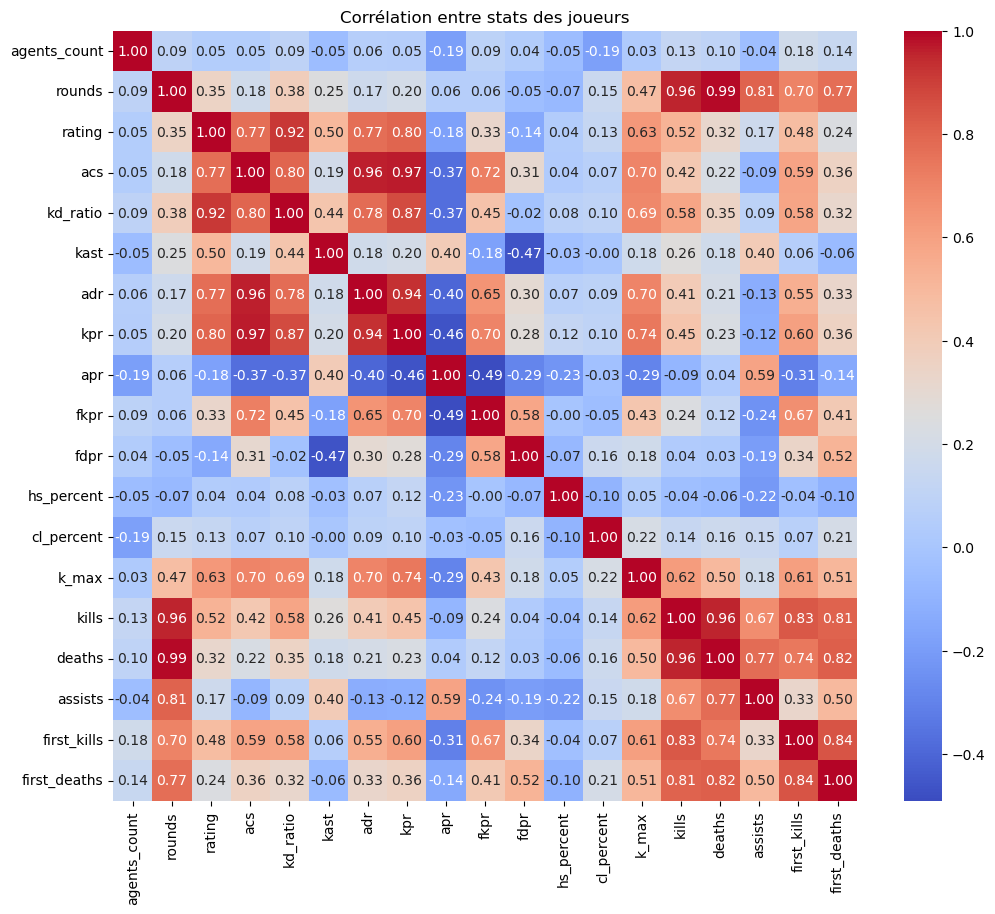

In [19]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv("/home/van-pc_ivan/Data_Ana/2025/player_stats.csv")

# Nettoyer les colonnes numériques
df['kast'] = df['kast'].str.rstrip('%').astype(float)
df['hs_percent'] = df['hs_percent'].str.rstrip('%').astype(float)
df['cl_percent'] = df['cl_percent'].str.rstrip('%').astype(float)

# Supprimer ou ignorer les colonnes non numériques pour la corrélation
numeric_cols = ['agents_count','rounds','rating','acs','kd_ratio','kast','adr',
                'kpr','apr','fkpr','fdpr','hs_percent','cl_percent','k_max',
                'kills','deaths','assists','first_kills','first_deaths']

# Calculer la matrice de corrélation
corr_matrix = df[numeric_cols].corr()

# Afficher
print(corr_matrix)

# Optionnel : visualiser avec un heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélation entre stats des joueurs")
plt.show()


              agents_count    rating       acs  kd_ratio      kast       adr  \
agents_count      1.000000  0.049806  0.045982  0.094625 -0.053613  0.058067   
rating            0.049806  1.000000  0.772421  0.916229  0.499638  0.771314   
acs               0.045982  0.772421  1.000000  0.800883  0.186153  0.961649   
kd_ratio          0.094625  0.916229  0.800883  1.000000  0.435851  0.775580   
kast             -0.053613  0.499638  0.186153  0.435851  1.000000  0.184095   
adr               0.058067  0.771314  0.961649  0.775580  0.184095  1.000000   
kpr               0.053313  0.799867  0.967059  0.870491  0.199536  0.935128   
apr              -0.190919 -0.177246 -0.373337 -0.369676  0.401889 -0.401045   
fkpr              0.089182  0.328054  0.717930  0.447845 -0.177860  0.645255   
fdpr              0.042139 -0.142206  0.312447 -0.020749 -0.466825  0.295491   
hs_percent       -0.048306  0.039346  0.035121  0.082228 -0.034826  0.073661   
cl_percent       -0.186955  0.130271  0.

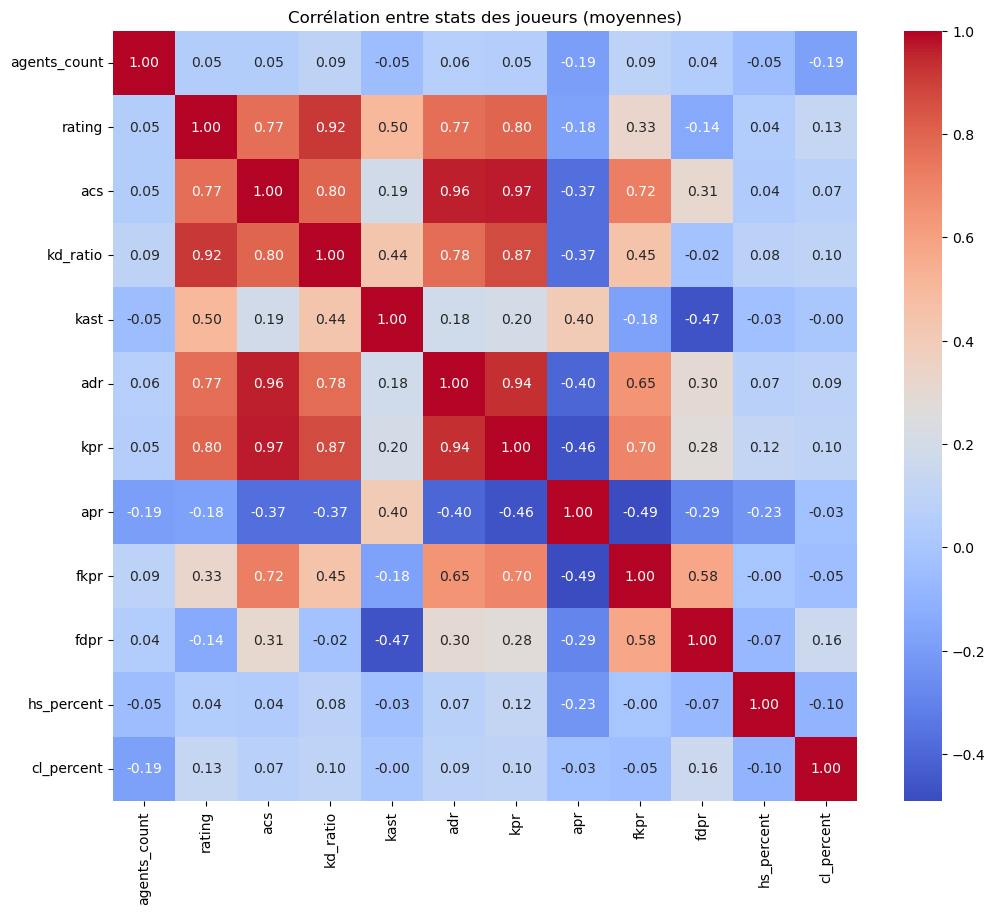

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le nouveau fichier CSV
df = pd.read_csv("/home/van-pc_ivan/Data_Ana/player_stats_moyennes_roles.csv")

# Les colonnes numériques à utiliser pour la corrélation
numeric_cols = ['agents_count','rating','acs','kd_ratio','kast','adr',
                'kpr','apr','fkpr','fdpr','hs_percent','cl_percent']

# Calculer la matrice de corrélation
corr_matrix = df[numeric_cols].corr()

# Afficher la matrice
print(corr_matrix)

# Visualiser avec un heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélation entre stats des joueurs (moyennes)")
plt.show()
